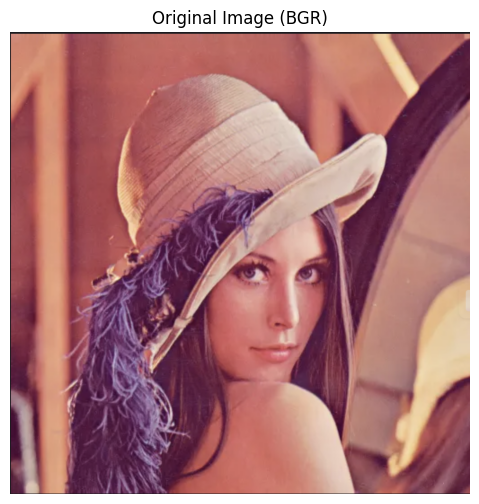

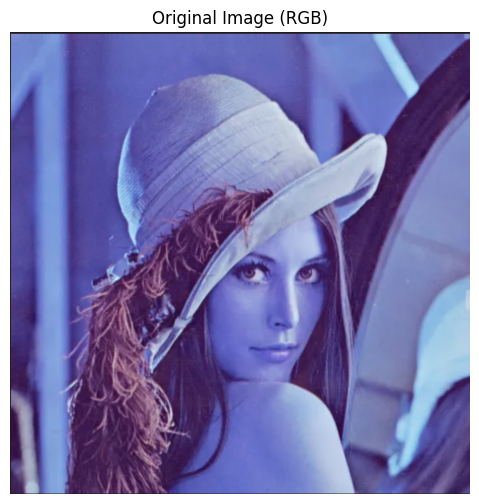

Image Dimensions: 1037x1032
Number of Channels: 3
Total Pixels: 1070184


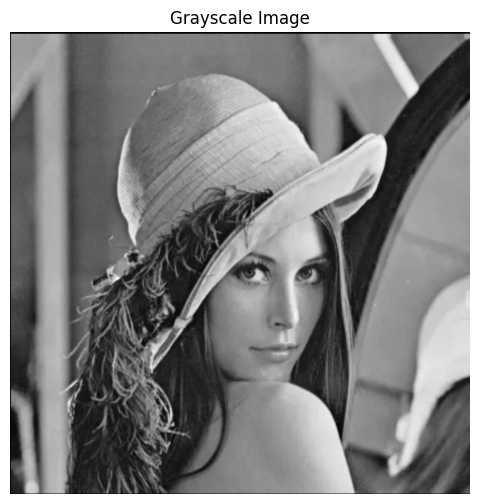

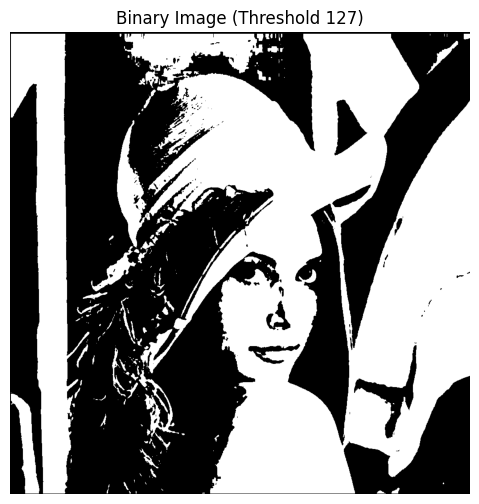

Area of Black Pixels: 538464
Size of Binary Image: (1037, 1032)


In [1]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Display an image with Matplotlib."""
    plt.figure(figsize=(6, 6))
    if len(image.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Read the image
image_path = 'Lenna.png'  # Replace with your image path
image_bgr = cv2.imread(image_path)

if image_bgr is None:
    print("Error: Image not loaded. Check the file path.")
else:
    # Step 2: Display the original image
    display_image("Original Image (BGR)", image_bgr)

    # Convert BGR to RGB for consistent visualization
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    display_image("Original Image (RGB)", image_rgb)

    # Step 3: Extract the size of the image
    height, width, channels = image_bgr.shape
    print(f"Image Dimensions: {height}x{width}")
    print(f"Number of Channels: {channels}")

    # Step 4: Calculate the total number of pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # Step 5: Convert RGB to Grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    display_image("Grayscale Image", image_gray)

    # Step 6: Convert RGB to Grayscale and Binary image using a threshold
    threshold_value = 127  # Set threshold value
    _, image_binary = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)
    display_image("Binary Image (Threshold 127)", image_binary)

    # Count the area of black pixels in the binary image
    black_pixels = np.sum(image_binary == 0)
    print(f"Area of Black Pixels: {black_pixels}")
    print(f"Size of Binary Image: {image_binary.shape}")


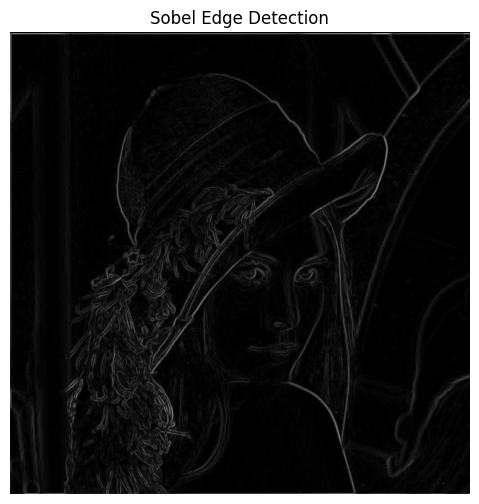

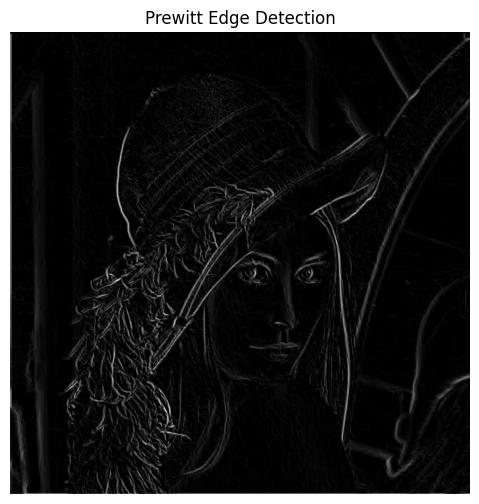

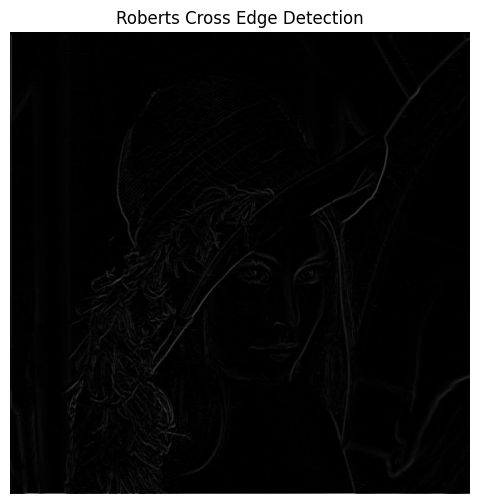

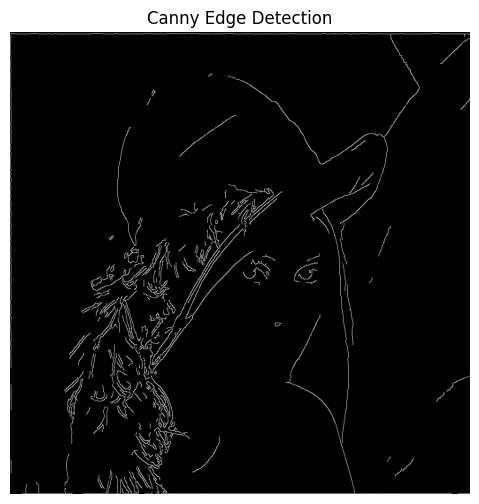

In [2]:

# Step 1: Edge Detection
# Sobel Operator
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
display_image("Sobel Edge Detection", sobel_combined)

# Prewitt Operator (manually implementing using kernels)
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(image_gray, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image_gray, -1, prewitt_kernel_y)
prewitt_combined = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))
display_image("Prewitt Edge Detection", prewitt_combined)

# Roberts Cross Operator
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(image_gray, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(image_gray, -1, roberts_kernel_y)
roberts_combined = cv2.magnitude(roberts_x.astype(float), roberts_y.astype(float))
display_image("Roberts Cross Edge Detection", roberts_combined)

# Canny Edge Detector
canny_edges = cv2.Canny(image_gray, 100, 200)
display_image("Canny Edge Detection", canny_edges)

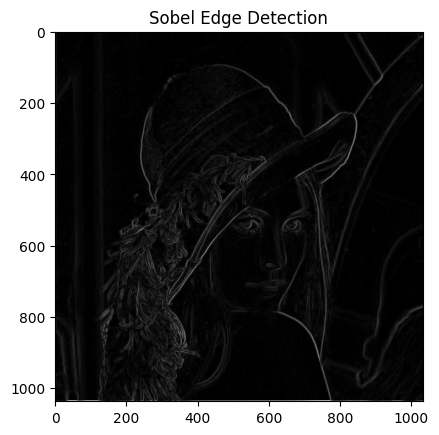

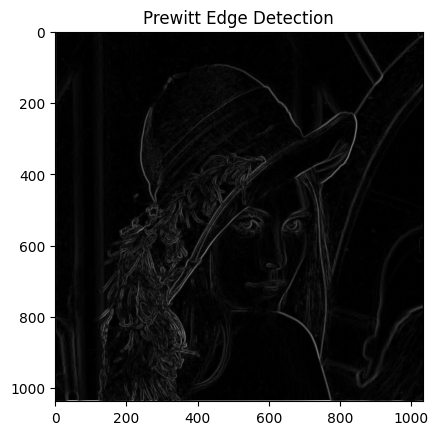

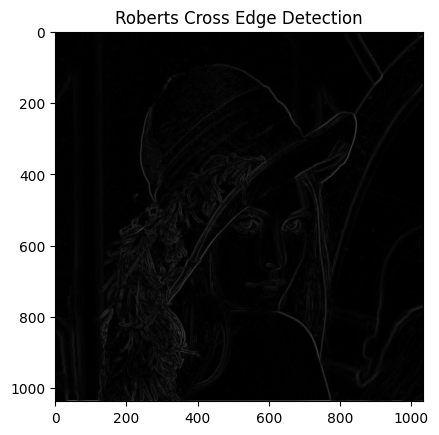

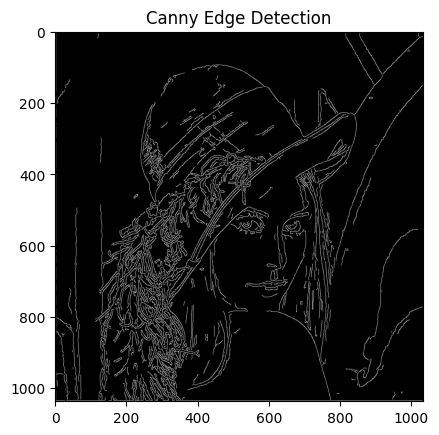

In [3]:
from skimage import filters, feature, color
from skimage import io
import matplotlib.pyplot as plt

# Assuming 'image' is already loaded and converted to grayscale
image_gray = color.rgb2gray(image_rgb)

# Sobel Operator
sobel_combined = filters.sobel(image_gray)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()

# Prewitt Operator
prewitt_combined = filters.prewitt(image_gray)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()

# Roberts Cross Operator
roberts_combined = filters.roberts(image_gray)
plt.imshow(roberts_combined, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.show()

# Canny Edge Detector
canny_edges = feature.canny(image_gray, sigma=1)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


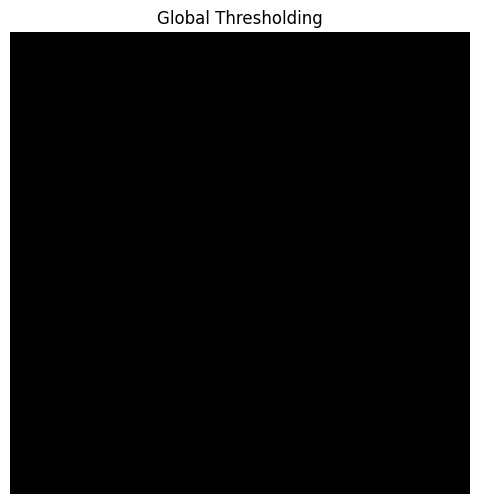

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1679: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


In [4]:
# Step 2: Image Segmentation
# Global Thresholding
_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
display_image("Global Thresholding", global_thresh)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
display_image("Adaptive Thresholding", adaptive_thresh)

# Edge Detection for Segmentation
display_image("Edge Detection Segmentation (Canny)", canny_edges)

# Region-Based Segmentation (Watershed Algorithm)
image_marker = np.zeros_like(image_gray, dtype=np.int32)

# Mark the sure background
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(global_thresh, kernel, iterations=3)

# Distance transform for foreground detection
dist_transform = cv2.distanceTransform(global_thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Marking unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Increase all labels by 1 to ensure background is not 0
markers[unknown == 255] = 0  # Mark unknown region with 0

# Watershed algorithm
image_rgb_markers = image_rgb.copy()
markers = cv2.watershed(image_rgb_markers, markers)
image_rgb_markers[markers == -1] = [255, 0, 0]  # Boundary in red
display_image("Region-Based Segmentation (Watershed)", image_rgb_markers)